# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Target :
Checking the quality of the Wine.
- Quality
(Score between 0 to 10).

### Inspiration

##### `Use machine learning to determine which physiochemical properties make a wine 'good'!`

### Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\Hello\Desktop\winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Checking the data dimension.
df.shape

(1599, 12)

we have 1599 rows and 12 columns including target column.

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### About the columns:

Generally we all know that there are different quality wines available in the market but not all are same. Some wine cost you to lakhs and in the same time some wines cost you to in hundreds as well. It all depends on the quality of the wine.  So here we have some information, and the target is basically the wine quality. So based on the feature we have to predict the quality of the wine. Based on given ratios (features) we need to predict that is it a good quality wine or not?.


#### Here we can see that this is not a binary classification problem. Here our target variable has some nominal data.
### Input Variables:

- fixed acidity: most acids involved with wine or fixed or nonvolatile
- volatile acidity: the amount of acetic acid in wine
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- total sulfur dioxide: amount of free and bound forms of S02
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
- alcohol: the percent alcohol content of the wine
### Output Variable:

- quality: output variable (based on sensory data, score between 0 and 10)



In [5]:
# checking the target
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Statistical Summary:

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Observation of above Describe method

- There is No null values present in any column.
- The standard deviation of columns 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide' are 1.4099,0.0470,10.4601,32.8953 respectively. And the same time the means of these columns are 2.5388,0.8746,15.8749,46.4677 respectively, which is not acceptable.
- It seems that the total sulfur dioxide have some outliers as there is significant difference between mean and median.

In [7]:
# Confirm that there is no nulls present in my  dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Checking the datatype of my columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Checking duplicates

In [9]:
duplicates=df[df.duplicated()]
duplicates.shape

(240, 12)

There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

# Exploratory Data Analysis

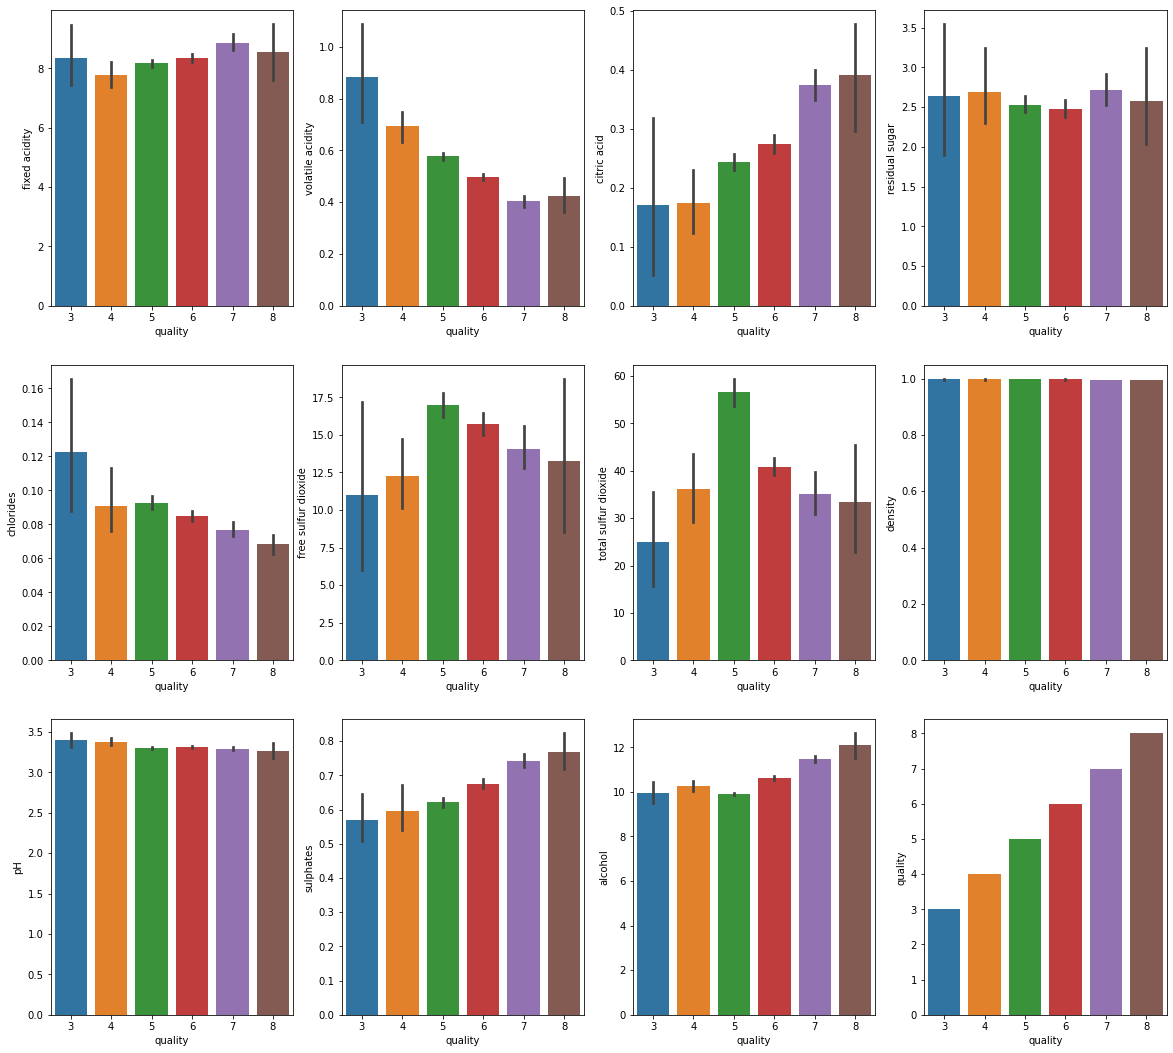

In [10]:
plt.figure(figsize=(20,25))
plotnumber=1
for val in df.columns:
    if plotnumber<=20:
        ax=plt.subplot(4,4, plotnumber)
        sns.barplot(x='quality',y=val,data=df)
        plt.ylabel(val,fontsize=10)
    plotnumber+=1
plt.show()

## Observation  of above visualization:
- The  columns 'fixed acidity','residual sugar','density', 'ph' & 'alcohol', all are alomost same in each type of wine and hardly shows any variance i.e. all are almost equaly distributed in each type of wine.
- volatile acidity is drastically go  down 3 to 7. From above barplot it can be seen there is decreasing trend in average volatile acidity content from 3 to 7.
- From above barplot it can be seen there is increasing trend in average alcohol content from 5 to 8.
- From above  barplot it can be seen there is continuous increasing trend in average sulphates & citric acid content from 3 to 8.


## Checking the outliers:


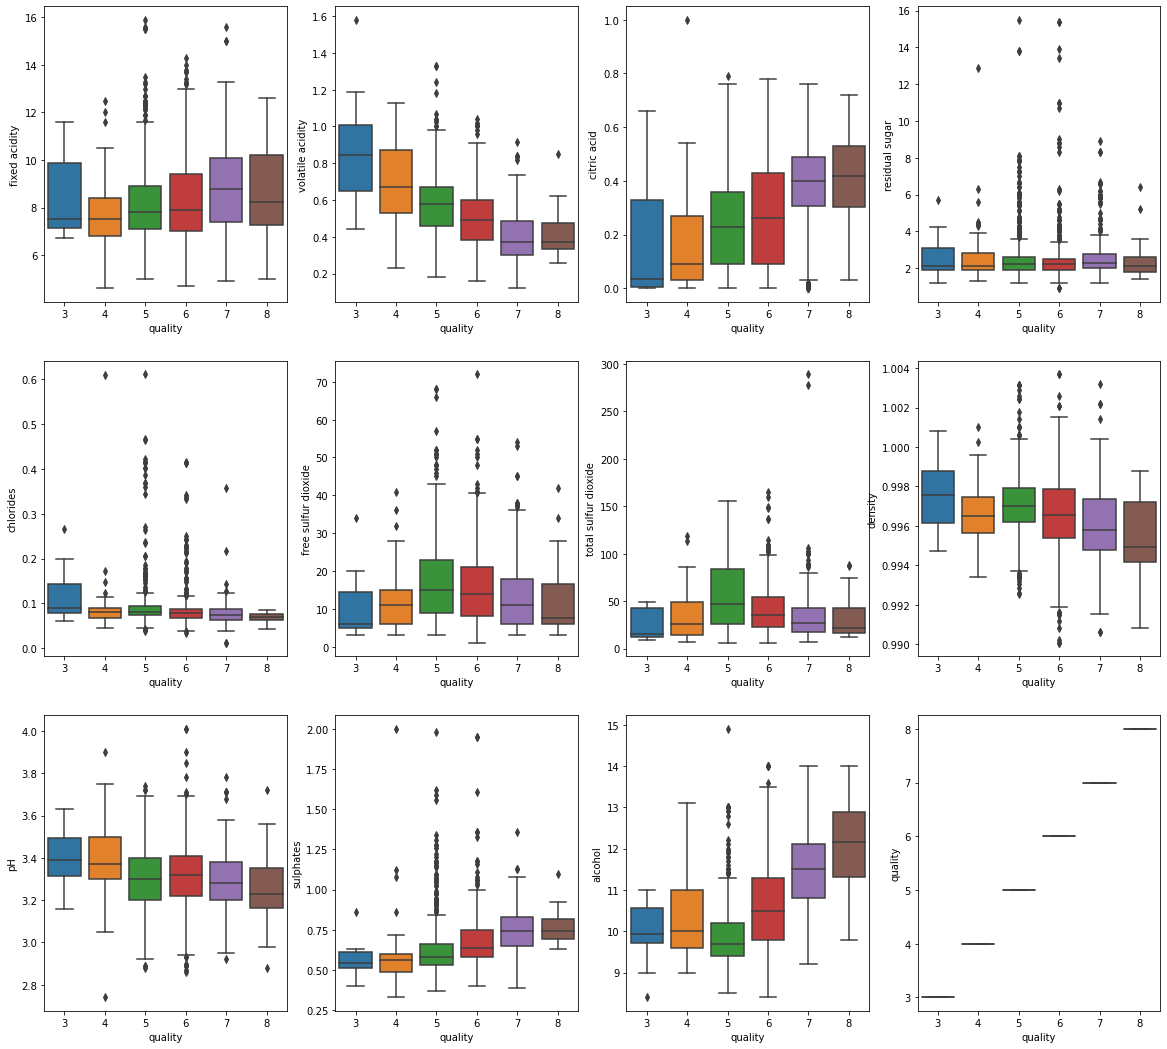

In [11]:
plt.figure(figsize=(20,25))
plotnumber=1
for val in df.columns:
    if plotnumber<=20:
        ax=plt.subplot(4,4, plotnumber)
        sns.boxplot(x='quality',y=val,data=df)
        plt.ylabel(val,fontsize=10)
    plotnumber+=1
plt.show()

## Observation of above visualization:
Every columns have good amount of outliers. we will treat them later.

## Let's check how my target column is distributed

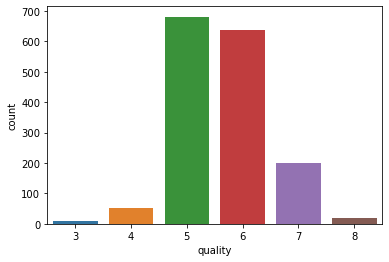

In [12]:
sns.countplot(x="quality",data=df)
plt.show()

- No. 5 and No. 6 quality content most of the data . we will see that later.

In [13]:
# Remove the outliers  by zscore
from scipy.stats import  zscore
z_score=zscore(df)
df_new=df.loc[(abs(z_score)<3).all(axis=1)]
df_new.shape

(1451, 12)

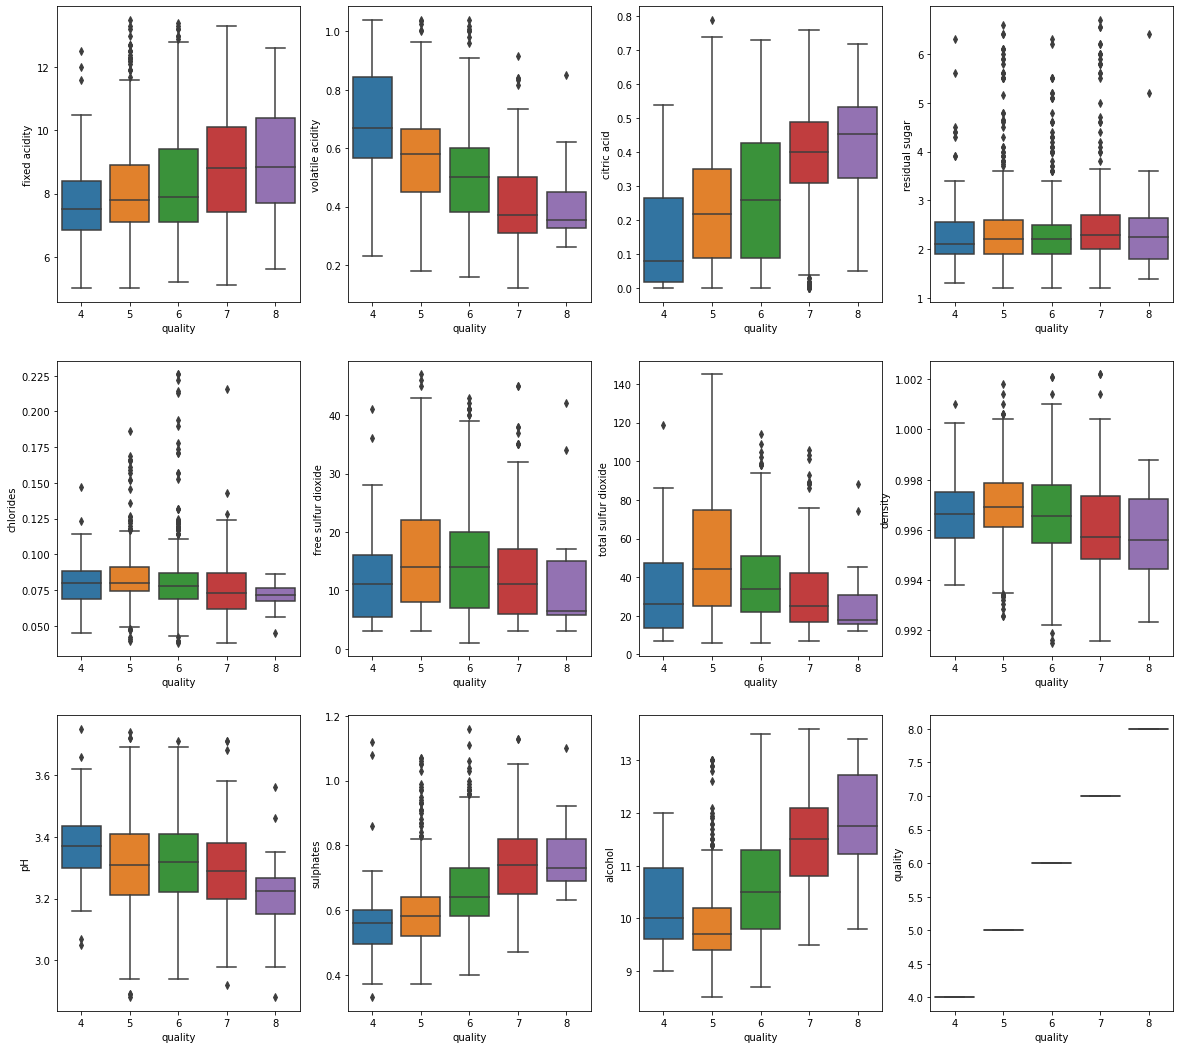

In [14]:
# Now let's  check in outliers Again
plt.figure(figsize=(20,25))
plotnumber=1
for val in df_new.columns:
    if plotnumber<=20:
        ax=plt.subplot(4,4, plotnumber)
        sns.boxplot(x='quality',y=val,data=df_new)
        plt.ylabel(val,fontsize=10)
    plotnumber+=1
plt.show()

There is lot of  outliers present yet. 

# Plotting Heatmap (correlation matrix)

<AxesSubplot:>

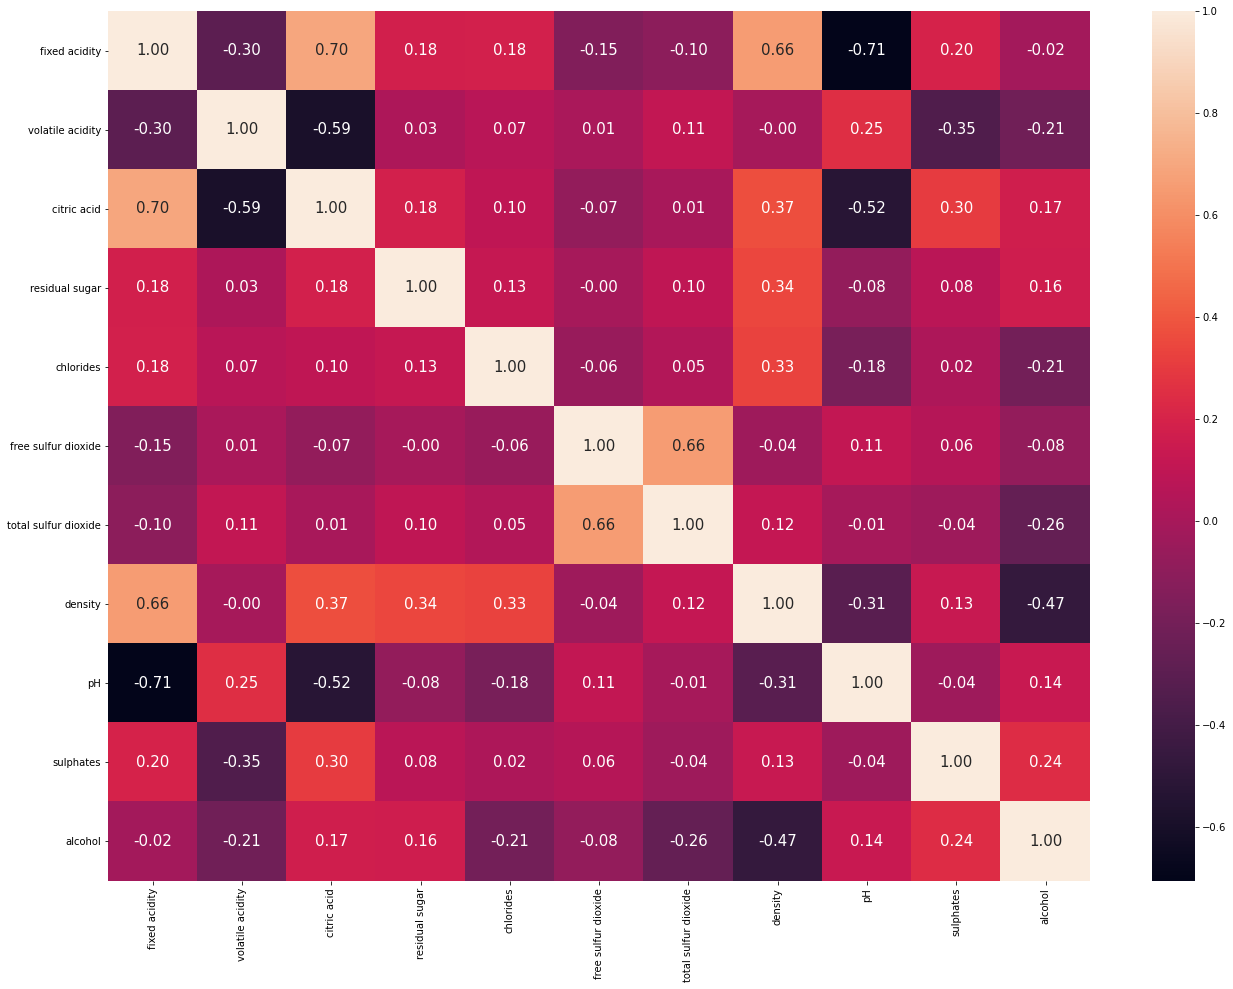

In [46]:
plt.figure(figsize=(22,16))
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':15},fmt='.2f')

## Observation of heatmap:
- volatile acidity, pH, total sulphar dioxide, free sulphar dioxide are negatively  correlated with the target variable.
- Seems there is no multicollinearity problem exist.
- Alcohol and Chlorides are very very correlated with the target variable.
- Citric acid, pH & density are very very  strongly  correlated with the target variable.

## Checking the skewness:


In [47]:
x=df_new.drop('quality',axis=1)
y=df_new['quality']
x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

We can see skewness most of  the  columns of  our dataset, we will remove the  skewness using power transform function.


In [48]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

## Observation:
- The commonly acceptable range of skewness is -0.5 to +0.5. Now after the power transformation the number of features having skewness more than 0.5 is 0.
#####  ` skewness has been removed, now we can proceed with  further steps.`

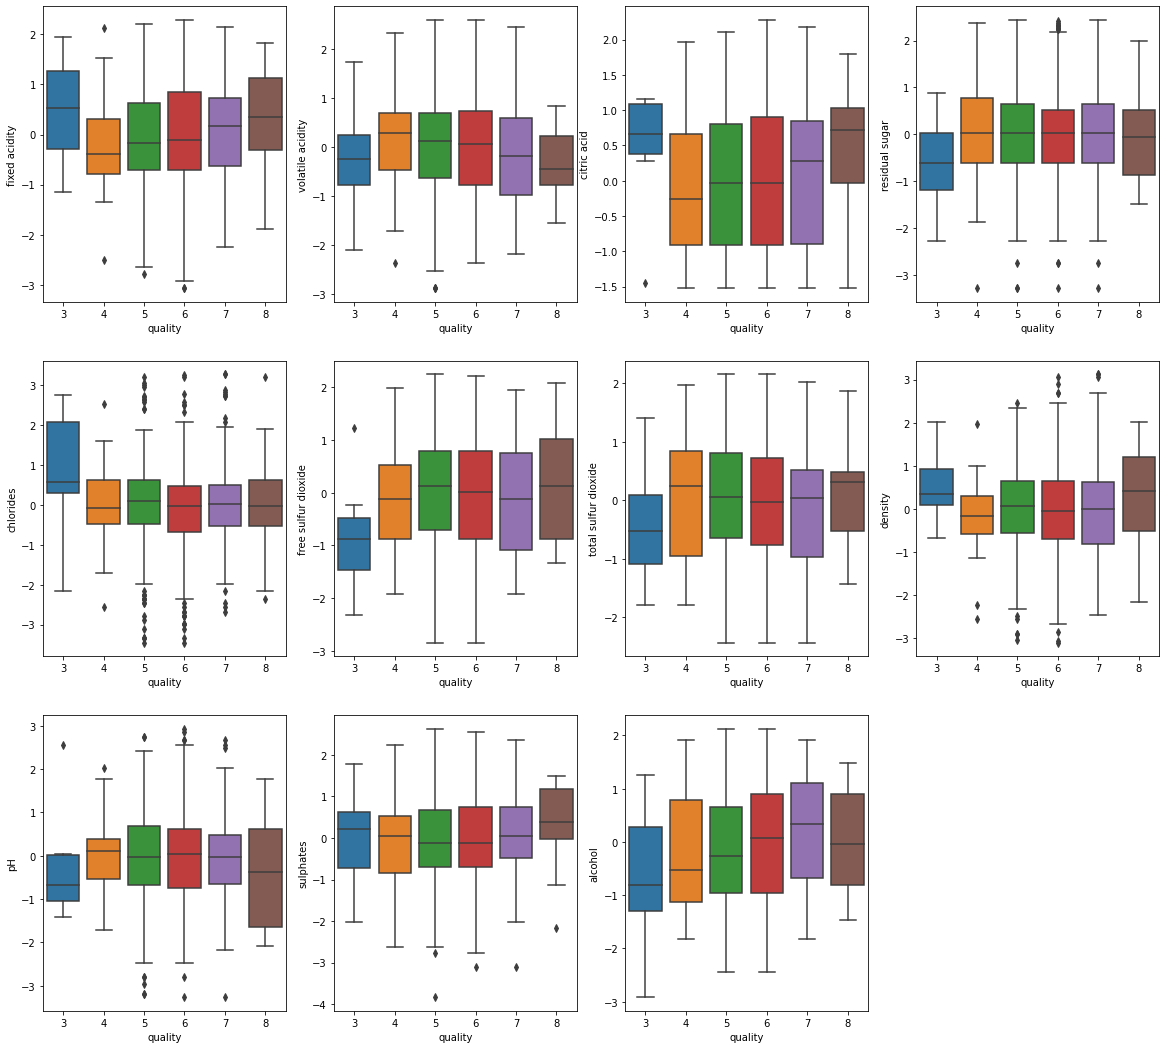

In [49]:
# Now let's  check in outliers Again
plt.figure(figsize=(20,25))
plotnumber=1
for val in x.columns:
    if plotnumber<=20:
        ax=plt.subplot(4,4, plotnumber)
        sns.boxplot(x=df['quality'],y=val,data=x)
        plt.ylabel(val,fontsize=10)
    plotnumber+=1
plt.show()

### Conclusion:
We have already removed the skewness of our dataset. After checking the outliers, we can clearily see that there are more outliers present in our dataset. But we removed most of the outliers from our dataset, and now these outlier whose are shown in above visualization those are not far from our maximum range . So we will keeping that move ahead.

## Now checking the distribution of label

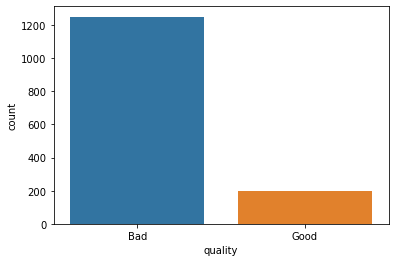

In [50]:
sns.countplot(x="quality",data=df_new)
plt.show()

After applying the  zscore, here we see we have removed one type of quality from the dataset.

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166


In [54]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [55]:
x_scaled.shape

(1451, 11)

## Converting target variable into binary classification

Let's set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [64]:
## Let's take our label 'y'
y=y.replace({4:'Bad',5:'Bad',6:'Bad',7:'Good',8:'Good'})

In [65]:
y.head()

0    Bad
1    Bad
2    Bad
3    Bad
4    Bad
Name: quality, dtype: object

In [66]:
y.value_counts()

Bad     1250
Good     201
Name: quality, dtype: int64

### Label Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
y_enc=lab_enc.fit_transform(y)
y_df=pd.DataFrame(y_enc,)
y_df.columns=['quality']
y_df

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1446,0
1447,0
1448,0
1449,0


<AxesSubplot:>

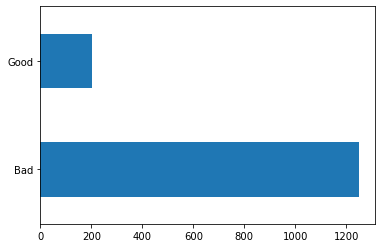

In [72]:
y.value_counts().plot(kind='barh')


we can clearly see in above plot that our dataset is highly imbalanced.


## Handeling imbalance dataset

In [43]:
from sklearn.model_selection import train_test_split

# Over Sampling using SMOTE ( Synthetic Minority Oversampling Technique)

In [39]:
!pip install -U imbalanced-learn




In [84]:
from imblearn.over_sampling import SMOTE


In [85]:
sm=SMOTE()

In [86]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y_df,train_size=0.75,random_state=77)

In [87]:
over_smp=SMOTE(0.90)

x_train_ns,y_train_ns=over_smp.fit_resample(x_train,y_train)



In [88]:
print("The Number of classes before fit {}".format(y_train.value_counts()))
print("The Number of classes after fit {}".format(y_train_ns.value_counts()))

The Number of classes before fit quality
0          937
1          151
dtype: int64
The Number of classes after fit quality
0          937
1          843
dtype: int64


#### ` Now here we get rid of the imbalancing problem. Now we are ready to Model Building now.`
Now we will build Decision Tree model and give new data for training which we balanced before.

# Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score

In [91]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier()

In [93]:
## let's see the training score of our model
dt.score(x_train_ns,y_train_ns)

1.0

In [94]:
y_pred=dt.predict(x_test)

In [95]:
accuracy_score(y_test,y_pred)

0.8650137741046832

In [96]:
print(confusion_matrix(y_test,y_pred))

[[288  25]
 [ 24  26]]


# Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
rf_pred=rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,rf_pred)*100)
print("confusion matrix ", confusion_matrix(y_test,rf_pred))

Accuracy  88.98071625344353
confusion matrix  [[299  14]
 [ 26  24]]


# SVC

In [103]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_ns,y_train_ns)
sc_pred=svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,sc_pred)*100)
print("confusion matrix ", confusion_matrix(y_test,sc_pred))

Accuracy  84.84848484848484
confusion matrix  [[280  33]
 [ 22  28]]


### Conclusion: 
The Decision Tree and Random Forest give us best accuracy. So we will take both models.

# Hyper Parameter tunning for Decision Tree

In [107]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [128]:
## We are tunning Four hyperparameters right now.
grid_param={
    'criterion':['gini','entropy'],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split': [2,3,4,5,6]
}

In [129]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dt,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)# n_jobs means use all the cores  in your system, for performance improvement.

In [130]:
grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [131]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [143]:
grid_pred=grid_search.best_estimator_.predict(x_test)


In [144]:
accuracy_score(y_test,grid_pred)

0.8512396694214877

# AUC curve for Decision Tree

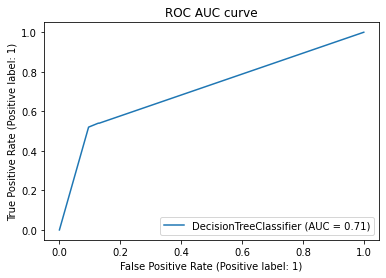

In [146]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC curve')
plt.show()

### `Final Accuracy for Decision Tree is 85 % and AUC score is 71%`

# # Hyper Parameter tunning for Random Forest

In [138]:
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [139]:
gvc=GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
gvc.fit(x_train_ns,y_train_ns)
gvc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [140]:
gvc_pred=gvc.best_estimator_.predict(x_test)
accuracy_score(y_test,gvc_pred)

0.8677685950413223

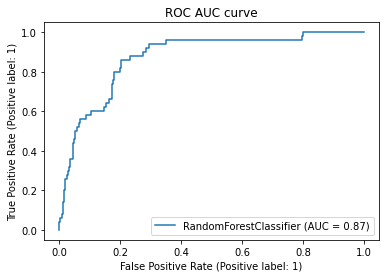

In [147]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gvc.best_estimator_,x_test,y_test)
plt.title('ROC AUC curve')
plt.show()

### ` Final Accuracy for Random Forest is 86.7% and AUC score is 87%.`

## ` Random Forest gives us the Best Result.`